# Introduction à la Science des données


## Travail pratique 04 – Modèles et évaluation

### Table des matières

[Exercice 1: Modèle à base de règles](#Exercice-1:-Modèle-à-base-de-règles)
- [1.1 Boxplots, pairplot et choix des variables](#1.1-Boxplots,-pairplot-et-choix-des-variables)
- [1.2 Création du modèle à base de règles](#1.2-Création-du-modèle-à-base-de-règles)
    -  [1.2.1 Définition des règles](#1.2.1-Définition-des-règles)
    -  [1.2.2 Prédictions](#1.2.2-Prédictions)
    -  [1.2.3 Scores et matrices de confusion](#1.2.3-Scores-et-matrices-de-confusion)
- [1.3 Question](#1.3-Question)

[Exercice 2: L'algorithme des k plus proches voisins (k-NN)](#Exercice-2:-L'algorithme-des-k-plus-proches-voisins-(k-NN))
- [2.1 Préparation des données](#2.1-Préparation-des-données)
- [2.2 Validation hold-out](#2.2-Validation-hold-out)
- [2.3 N_fold cross validation](#2.3-N_fold-cross-validation)

[Exercice 3: Evaluation des résultats et matrice de confusion](#Exercice-3:-Evaluation-des-résultats-et-matrice-de-confusion)

[Exercice 4: L’algorithme LVQ](#Exercice-4:-L’algorithme-LVQ)



***
Professeurs: Carlos Peña et Stephan Robert

Assistant(s): Thibault Schowing, Xavier Brochet

Emails : prenom.nom@heig-vd.ch

Rendu:
- Date: 11.12.2022, 23h55 (3 semaines)

- Modalité: Une fois complété, rendez directement ce notebook modifié et renommé correctement comme suit "**TP4_ISD_SA2022_Nom1_Nom2.ipynb**" en remplaçant Nom1 et Nom2 par vos noms de famille respectifs puis uploader votre fichier sur Cyberlearn.
- Les questions sont généralement indiquées en **gras** ou en bleu par une liste d’instructions et les endroits où répondre sont indiqués par un "*Réponse:*" pour les réponses textuelles. 
- Pour les réponses nécessitant d'écrire du code, les cellules ont déjà été crées et un commentaire indique où/quoi répondre.

Note: 
- Ce TP est noté sur 6, pour un poids de 30%

Étudiants:

- Rachel Tranchida
- Eva Ray

<div class="alert alert-block alert-success">
<b>Objectifs </b>
</div>

- Créer un modèle simple à base de règles
- Utiliser l'algorithme kNN vu en classe pour traiter le problème de classification des vins
- Évaluer les modèles à l'aide d'une matrice de confusion
- L'algorithme LVQ (Learning Vector Quantization)

<div class="alert alert-block alert-info">
<b>Corrections: </b> Ce notebook vous sera renvoyé via Cyberlearn ou  un autre canal. Les informations principales concernant les corrections seront indiquées après chaque section (bannière bleue) avec le nombre de points. Il est possible que des remarques concernant le code soient directement ajoutées dans celui-ci.
</div>


**Veillez tout d'abord à installer les packages suivants dans l'environnement correspondant au kernel que vous utilisez s'ils ne le sont pas déjà.**

<div class="alert alert-block alert-danger">
<b>Merci de ne pas mettre de commande pip dans le code du notebook ou de le commenter une fois celui-ci exécuté. </b> De plus, si vous ajoutez des "cellules brouillon" pour tester des valeurs de variables, sentez vous libre de les supprimer une fois vos tests effectués pour rendre un rapport propre et lisible. 
</div>

 
    
    

In [1]:
# Imports

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from math import sqrt
import itertools

# Package scikit-learn
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Pour k-NN
from collections import Counter, defaultdict

# Pour validation hold-out

import random
from random import randrange
random.seed(10)



## Exercice 1: Modèle à base de règles


Lisez le fichier wine.data et créez les graphiques à l'aide du code ci-dessous.

In [2]:
headers = ['Note', 'Alcool', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 
           'Hue', 'OD280/OD315 of diluted wines', 'Proline']

wines = pd.read_csv('./wine.data', names=headers)



### 1.1 Boxplots, pairplot et choix des variables



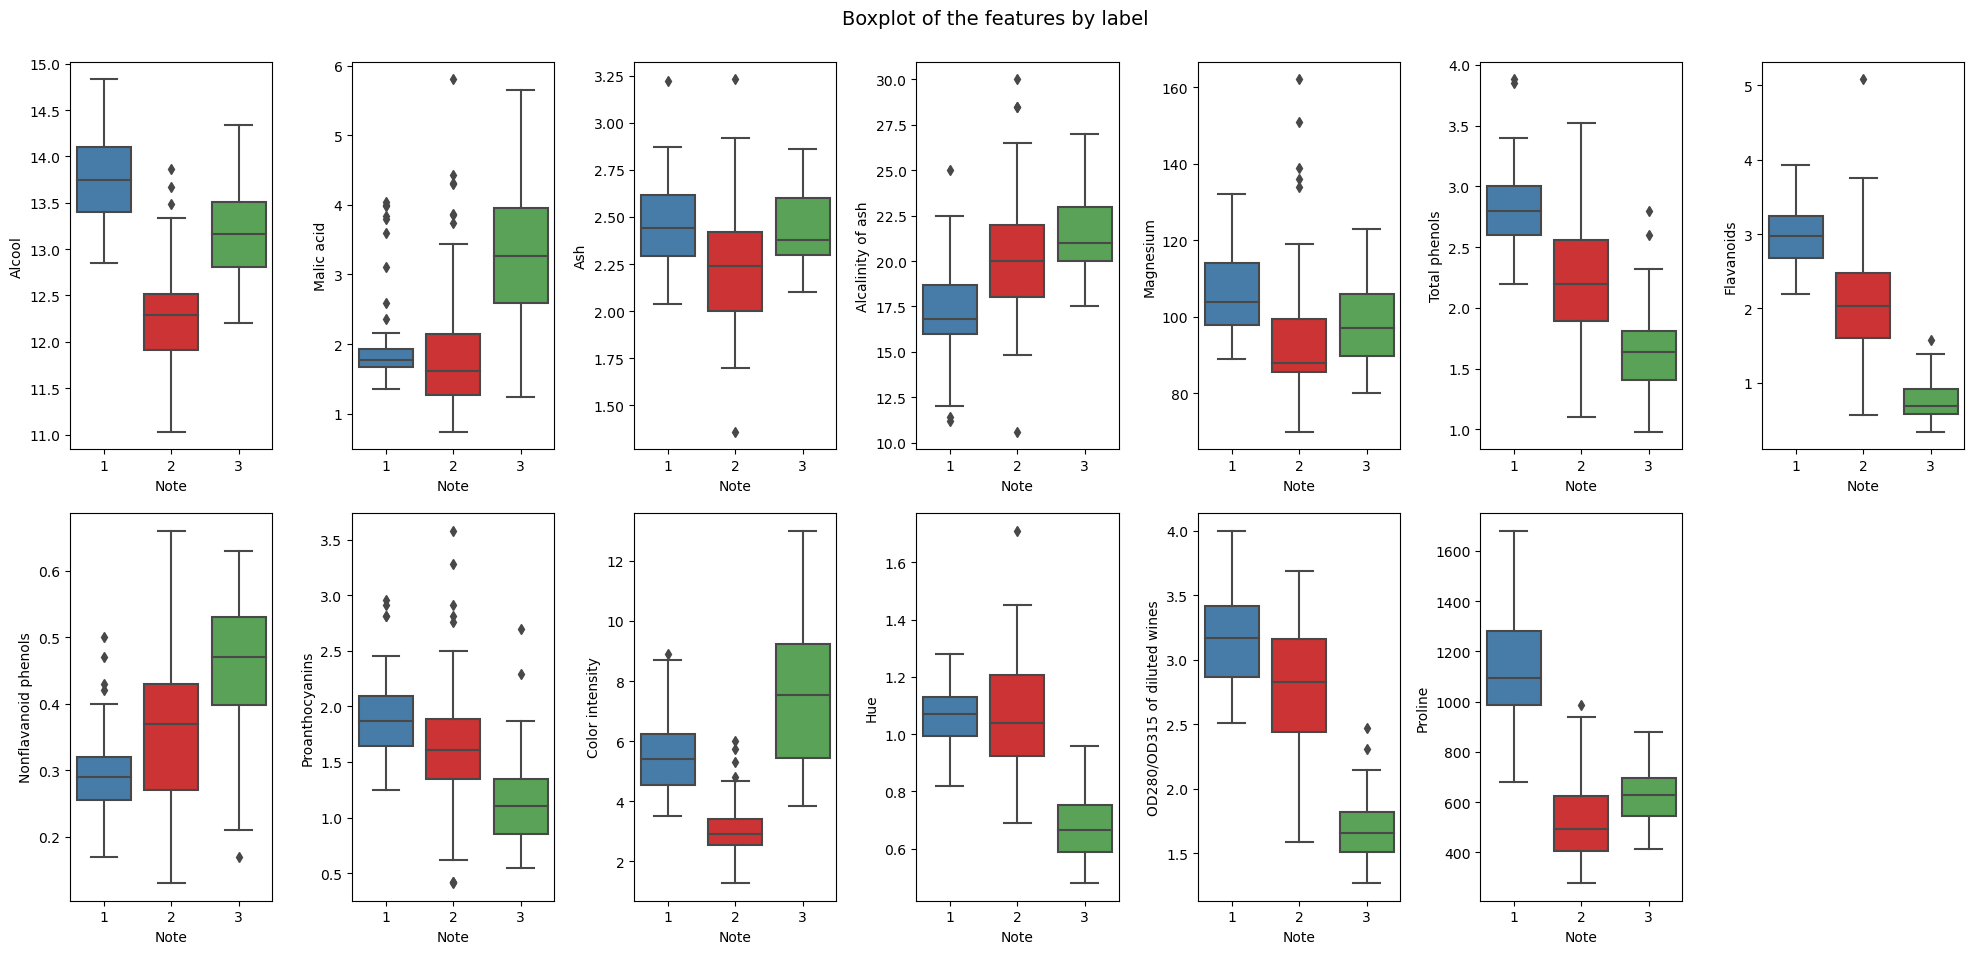

In [4]:
fig, axs = plt.subplots(2, 7, figsize=(20, 10))
axs = axs.flatten()
for i, col in enumerate(wines.columns[1:]):
    sns.boxplot(x="Note",y=col, data=wines, ax=axs[i], palette={1: '#377eb8', 2: '#e41a1c', 3: '#4daf4a'})
fig.suptitle('Boxplot of the features by label', fontsize=14)    
fig.tight_layout(rect=[0, 0.03, 1, 0.98])
fig.delaxes(axs[13])


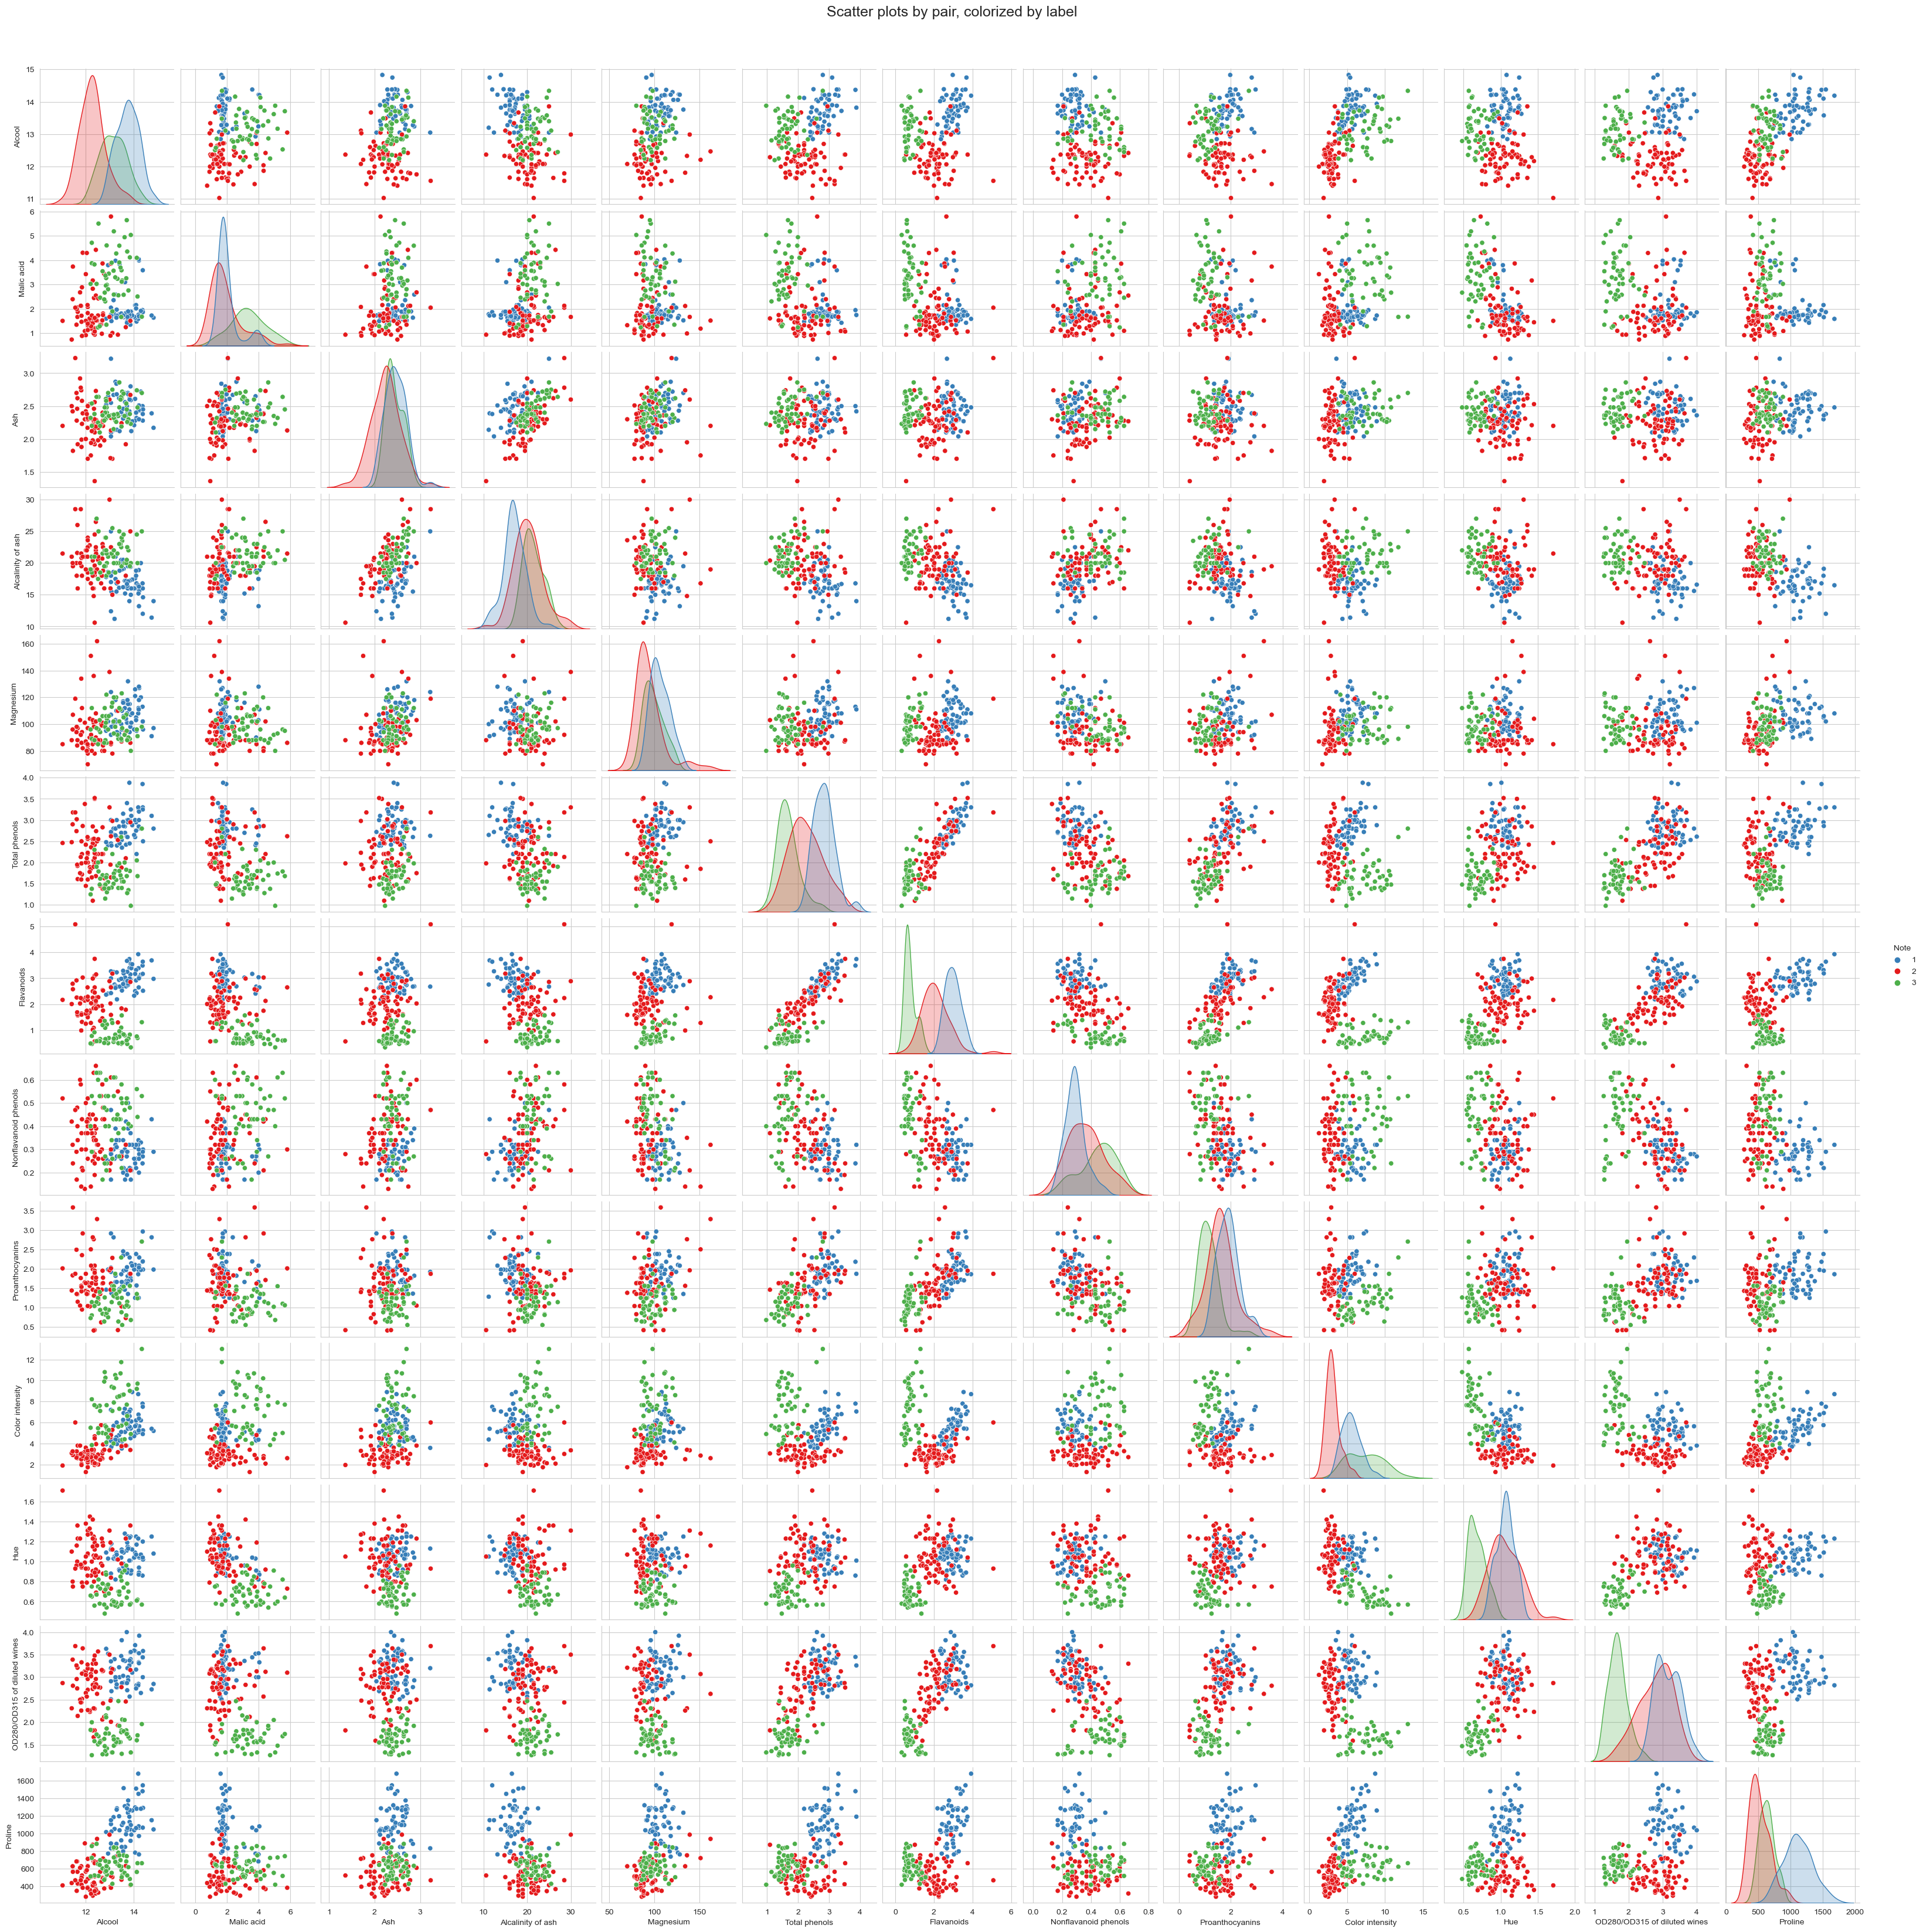

In [4]:
g = sns.pairplot(wines, hue='Note', palette={1: '#377eb8', 2: '#e41a1c', 3: '#4daf4a'})
plt.suptitle('Scatter plots by pair, colorized by label', fontsize=18, y=1.02);

Pour plusieurs variables on voit qu'il est possible de séparer les trois classes assez aisément. Ainsi les variables `Alcool`, `Color intensity` et `Flavanoids` semblent les plus adaptées à cette tâche. 



### 1.2 Création du modèle à base de règles

Suivez la structure du code ci-après pour implémenter un modèle à base de règles. Complétez les parties manquantes et écrivez les fonctions demandées. **Lisez bien les commentaires afin de bien comprendre la logique implémentée**. 


#### 1.2.1 Définition des règles

(6 points)

Dans cette partie vous allez écrire les règles permettant de distinguer les trois classes (Note) à l'aide des variables `Alcool`, `Color intensity` et `Flavanoids`. Utilisez pour cela les valeurs que vous avez trouvées au TP3 ou servez vous des graphiques ci-dessus pour les déterminer. 

Servez-vous de la fonction donnée en exemple pour créer les fonctions suivantes (**respectez les noms !**): 

- *class_by_alcool()*: utilise la variable Alcool uniquement. 
- *class_by_flavanoids()*: utilise la variable Flavanoids uniquement.
- *class_by_color_intensity()*: utilise la variable Color intensity uniquement
- *class_by_flav_alcool()*: utilise les variables Flavanoids et Alcool
- *class_by_color_alcool()*: utilise les variables Color intensity et Alcool
- *class_by_color_flav()*: utilise les variables Color intensity et Flavanoids



In [5]:
# Les fonctions suivantes seront appliquées au DataFrame à l'aide de la fonction apply(). 
# Le DataFrame sera donc passé en paramètres et les opérations effectuées sur toutes les observations. 


# ------------------------------------------------------------------
# Définition des règles
# ------------------------------------------------------------------
'''
def class_by_XXXXXX(df): # ou class_by_XXXXXX_YYYYYY(df):
    """
    Retourne la classe (1, 2 ou 3) selon la variable XXXXXX (et YYYYYY -> en ayant accès à tout le dataframe, on peut
    aussi tester une seconde variable ou plus).
    """
    if(df["XXXXXX"] > 42 and....):
        return 1
    elif(df["YYYYYY"] > 42):
        return 2
    else:
        return 3
'''

    

# Complétez le code selon la donnée ci-dessus en respectant les noms de fonction. 
def class_by_alcool(df):
    if(df["Alcool"] < 12.6):
        return 2
    elif(df["Alcool"] < 13.5 and df["Alcool"] >= 12.6):
        return 3
    else:
        return 1
def class_by_flavanoids(df):
    if(df["Flavanoids"] < 1.6):
        return 3
    elif(df["Flavanoids"] > 2.5):
        return 1
    else:
        return 2
    
def class_by_color_intensity(df):
    if(df["Color intensity"] < 3.8):
        return 2
    elif (df["Color intensity"] >= 3.8 and df["Color intensity"] < 6.25):
        return 1
    else:
        return 3
    
def class_by_flav_alcool(df):
    if(df["Flavanoids"] < 1.8 and df["Alcool"] > 12.2):
        return 3
    elif(df["Flavanoids"] >= 2.1 and df["Alcool"] > 12.8):
        return 1
    else:
        return 2
    
def class_by_color_alcool(df):
    if(df["Color intensity"] < 4 and df["Alcool"] > 14 or df["Color intensity"] >= 7.5):
        return 3
    elif(df["Color intensity"] < 8  and df["Alcool"] > 13):
        return 1
    else:
        return 2
    
def class_by_color_flav(df):
    if(df["Color intensity"] > 3.9  and df["Flavanoids"] < 1.8 ):
        return 3
    elif(df["Color intensity"] >= 4 and df["Flavanoids"] >= 2 ):
        return 1
    else:
        return 2


#### 1.2.2 Prédictions

(6 points)

Pour chacune des règles créées ci-dessus, ajoutez une colonne dans df, une copie du DataFrame wines. Utilisez des noms parlants comme "pred_alcool" ou "pred_alcool_flav" afin que l'on comprenne bien qu'il s'agit de quelle prédiction il s'agit. Un exemple de l'utilisation de la fonction apply() est donné en commentaire. 




In [6]:
# ------------------------------------------------------------------
# Creation de la / des colonnes de prédiction 
# ------------------------------------------------------------------

# Copie du DataFrame pour ne pas modifier l'original accidentellement. 
df = wines.copy()

# Créez une nouvelle colonne qui contient le résultat de la fonction class_by_YYYYYY

# Faites le pour chaque fonction créées ci-dessus. 

# Exemple: df["pred_NNN"] = df.apply(class_by_YYYYYY, axis=1)
df["pred_alcool"] = df.apply(class_by_alcool, axis=1)
df["pred_flavanoids"] = df.apply(class_by_flavanoids, axis=1)
df["pred_color_intensity"] = df.apply(class_by_color_intensity, axis=1)
df["pred_flav_alcool"] = df.apply(class_by_flav_alcool, axis=1)
df["pred_color_alcool"] = df.apply(class_by_color_alcool, axis=1)
df["pred_color_flav"] = df.apply(class_by_color_flav, axis=1)
df


Note  Alcool  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1   14.23        1.71  2.43               15.6        127   
1       1   13.20        1.78  2.14               11.2        100   
2       1   13.16        2.36  2.67               18.6        101   
3       1   14.37        1.95  2.50               16.8        113   
4       1   13.24        2.59  2.87               21.0        118   
..    ...     ...         ...   ...                ...        ...   
173     3   13.71        5.65  2.45               20.5         95   
174     3   13.40        3.91  2.48               23.0        102   
175     3   13.27        4.28  2.26               20.0        120   
176     3   13.17        2.59  2.37               20.0        120   
177     3   14.13        4.10  2.74               24.5         96   

     Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0             2.80        3.06                  0.28             2.29   
1             2.65        2.76                  0.26             1.28   
2             2.80        3.24                  0.30             2.81   
3             3.85        3.49                  0.24             2.18   
4             2.80        2.69                  0.39             1.82   
..             ...         ...                   ...              ...   
173           1.68        0.61                  0.52             1.06   
174           1.80        0.75                  0.43             1.41   
175           1.59        0.69                  0.43             1.35   
176           1.65        0.68                  0.53             1.46   
177           2.05        0.76                  0.56             1.35   

     Color intensity   Hue  OD280/OD315 of diluted wines  Proline  \
0               5.64  1.04                          3.92     1065   
1               4.38  1.05                          3.40     1050   
2               5.68  1.03                          3.17     1185   
3               7.80  0.86                          3.45     1480   
4               4.32  1.04                          2.93      735   
..               ...   ...                           ...      ...   
173             7.70  0.64                          1.74      740   
174             7.30  0.70                          1.56      750   
175            10.20  0.59                          1.56      835   
176             9.30  0.60                          1.62      840   
177             9.20  0.61                          1.60      560   

     pred_alcool  pred_flavanoids  pred_color_intensity  pred_flav_alcool  \
0              1                1                     1                 1   
1              3                1                     1                 1   
2              3                1                     1                 1   
3              1                1                     3                 1   
4              3                1                     1                 1   
..           ...              ...                   ...               ...   
173            1                3                     3                 3   
174            3                3                     3                 3   
175            3                3                     3                 3   
176            3                3                     3                 3   
177            1                3                     3                 3   

     pred_color_alcool  pred_color_flav  
0                    1                1  
1                    1                1  
2                    1                1  
3                    3                1  
4                    1                1  
..                 ...              ...  
173                  3                3  
174                  1                3  
175                  3                3  
176                  3                3  
177                  3                3  

[178 rows x 20 columns]

#### 1.2.3 Scores et matrices de confusion

(6 points)

Affichez les scores (Accuracy) et matrices de confusion *pour chaque règle*. Pour cela, on utilise les fonctions [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), [confusion_matrix()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) et [ConfusionMatrixDisplay()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html) fournies par ScikitLearn et importée en amont de ce Notebook. Utilisez le code donné en exemple ci-dessous. 



Accuracy: 0.6910112359550562


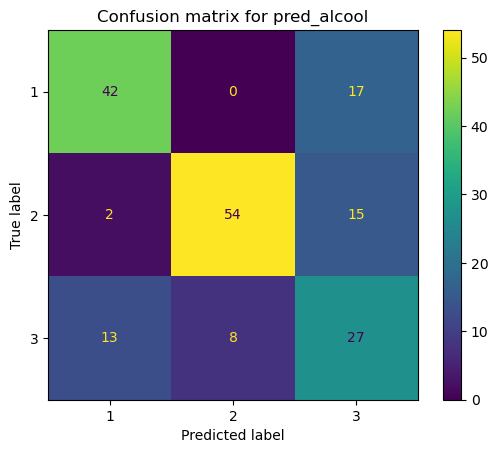

Accuracy: 0.7752808988764045


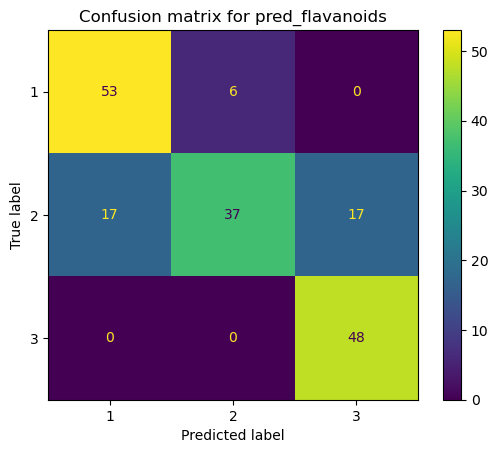

Accuracy: 0.7134831460674157


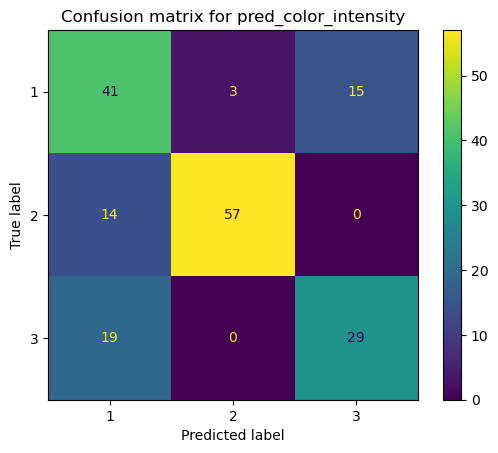

Accuracy: 0.9044943820224719


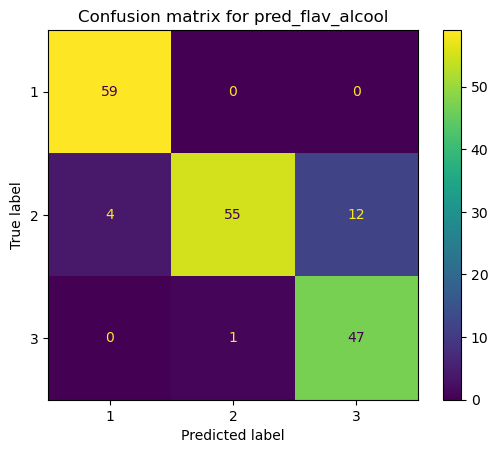

Accuracy: 0.7921348314606742


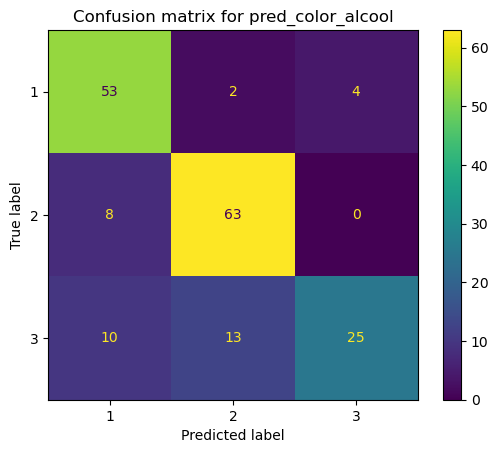

Accuracy: 0.9044943820224719


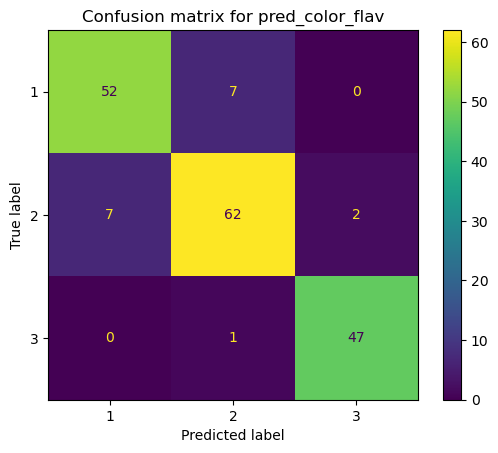

'\nscore = accuracy_score(df["Note"], df["pred_NNN"])\nprint(f"Accuracy: {score}")\n\ncm = confusion_matrix(df["Note"], df["pred_NNN"])\ndisp = ConfusionMatrixDisplay(cm, display_labels = ["1", "2", "3"])\ndisp.plot()\nplt.show()\n'

In [7]:
# ------------------------------------------------------------------
# Pour chaque modèle, affichez le score (Accuracy) et la matrice de confusion (code ci-dessous)
# ------------------------------------------------------------------

# Vous pouvez écrire une boucle ou afficher le score et la matrice à la suite ou dans des cellules séparées. 
# Libre à vous de choisir la solution qui vous plait le plus !
for col in df.loc[:, 'pred_alcool':]:
    score = accuracy_score(df["Note"], df[col])
    print(f"Accuracy: {score}")
    cm = confusion_matrix(df["Note"], df[col])
    disp = ConfusionMatrixDisplay(cm, display_labels = ["1", "2", "3"])
    disp.plot()
    disp.ax_.set_title(f"Confusion matrix for {col}")
    plt.show()
'''
score = accuracy_score(df["Note"], df["pred_NNN"])
print(f"Accuracy: {score}")

cm = confusion_matrix(df["Note"], df["pred_NNN"])
disp = ConfusionMatrixDisplay(cm, display_labels = ["1", "2", "3"])
disp.plot()
plt.show()
'''


____

### 1.3 Question

(2 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Laquelle de vos règles donne le meilleur résultat ? Y a-t-il une classe plus difficile à prédir qu'une autre ?</p>

*Réponse:* <br>
On a deux règles qui donnent une bonne accuarcy similaire à ~90%. C'est la classification par "Color intensity" et "Flavanoids" et la classification par "Alccol" et "Flavanoids". <br>
D'après les matrices de confusion, ce sont les classes 2 et 3 qui sont les plus difficiles à prédire car ce sont celles auxqulles sont associés le plus de faux négatifs. Au contraire, la classe 1 est la plus facile à prédire avec nos règles, on voit que les données de cette classe sont les mieux classées.


<div class="alert alert-block alert-info">
<b>Corrections 1.1 - 1.3: </b> Points obtenus: /20
</div>

Remarques: 

___
## Exercice 2: L'algorithme des k plus proches voisins (k-NN)



Complétez le code de k-NN vu en classe donné ci-dessous pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles pour K=1,2,3,5,7 et 10. Les endroits où vous devez modifier ou ajouter du code sont indiqués. Il n'y a rien à modifier avant le point 2.2. Lisez bien la donnée pour savoir quoi modifier et où. 

- Utilisez la méthode de validation hold-out (calculez la moyenne des performances en répétant le split 10 fois). 
- Utilisez la validation croisée avec *n_folds = 5*
- Testez chaque méthode avec le dataset brut et le dataset normalisé/standardisé



Pour chaque k, vous aurez donc 10 valeurs pour la validation hold-out et 5 pour n_fold.  


In [9]:
# Code du cours - rien à modifier


# Split a dataset into a train and test set (validation hold-out)
def train_test_split(dataset, split=0.60):
    train = list()
    train_size = split * len(dataset)
    dataset_copy = list(dataset)
    while len(train) < train_size:
        index = randrange(len(dataset_copy))
        train.append(dataset_copy.pop(index))
    return train, dataset_copy

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors

# Make a classification prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[0] for row in neighbors]
    #print(f"Output values classification: {output_values}")
    prediction = max(set(output_values), key=output_values.count)
    return prediction

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

# Split a dataset into n folds
def cross_validation_split(dataset, n_folds):
    dataset_split = list()
    dataset_copy = list(dataset)
    fold_size = int(len(dataset) / n_folds)
    for _ in range(n_folds):
        fold = list()
        while len(fold) < fold_size:
            index = randrange(len(dataset_copy))
            fold.append(dataset_copy.pop(index))
        dataset_split.append(fold)
    return dataset_split





### 2.1 Préparation des données

(6 points)

Création de deux datasets: 
- un avec les données brutes
- un avec les données normalisées

**Lisez sans modifier le code ci-dessous pour en comprendre le sens et répondez aux questions.**

In [10]:
# Préparation des datasets - rien à modifier

#=====================================================================
# Préparation des données brutes 
#=====================================================================

# Convertion en liste de listes au lieu de DataFrame
data = wines.values.tolist()

#=====================================================================
# Préparation des données normalisées
#=====================================================================


# Différents moyens de standardiser les données mis à disposition par Scikit-learn
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Nous allons utiliser le StandardScaler, qui va normaliser les données avec une moyenne de 0 et un écart-type de 1
scaler_string = "StandardScaler" # pour l'affichage dans le titre des plots si nécessaire
scaler = StandardScaler()


# Créer une copie et prendre une liste des colonnes des données indépendantes (entrées)
df_normalized = wines.copy()
cols = wines.columns[wines.columns != 'Note']

# Remplacer les colonnes des données par les données transformées
df_normalized[cols] = scaler.fit_transform(df_normalized[cols])

# convertion en liste de listes pour k-NN
data_normalized = df_normalized.values.tolist()

# K's à tester
Ks = [1, 2, 3, 5, 7, 10]


<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Qu'est-ce que la normalisation/standardisation des données ? </p>

Décrivez le concept en une ou deux phrases. 



*Réponse:* <br>
La normalisation sert à homogénéiser les données afin de pouvoir les comparer et calculer des mesures qui ont du sens. Dans les cas les plus simples, la normalisation des données consiste à ramener les valeurs mesurées avec des échelles différentes à une échelle commune. Dans des cas plus complexes, la normalisation standardise la moyenne et l’écart-type, ce qui permet de simplifier le problème à résoudre. Dans ce cas-là, on essaie souvent de se rapprocher d'une distribution gausienne normale des données, donc d'une moyenne de 0 et d'un écart-type de 1.
____

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Quelles sont les différences entre les StandardScaler, MinMaxScaler et RobustScaler ?</p>

Note: Aidez-vous de [la doc](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) ou d'autres ressources pour répondre. 


*Réponse:*<br>
* StandardScalar: Rapproche les données d'une distribution normale en leur soustrayant leur moyenne et en les divisant par l'écart-type
* MinMaxScaler: Change l'échelle des valeurs afin qu'elle se trouve entre une valeur minimum et une valeur maximum données.
* RobustScaler: Redimensionne les données en utilisant des mesures qui sont robustes face aux valeurs aberrantes. Cette fonction retire la médiane et redimensionne les données par l'écart inter-quartile (par défaut).
____

<div class="alert alert-block alert-info">
<b>Corrections 2.1: </b> Points obtenus: /6
</div>

Remarques: 

### 2.2 Validation hold-out


#### 2.2.1 Implémentation
(6 points)


Complétez le code ci-dessous en suivant les indications en commentaire. Respectez le nombre de lignes indiqué.

Utilisez en premier le dataset "***data***" puis une fois votre code fonctionnel, copiez la cellule (ou ajoutez un niveau de boucle si vous voulez) et remplacez le par le dataset avec les données normalisées: "***data_normalized***". N'oubliez pas de modifier le titre des graphiques pour plus de clarté (indiquez quel données sont utilisées). 


AttributeError: 'list' object has no attribute 'values'

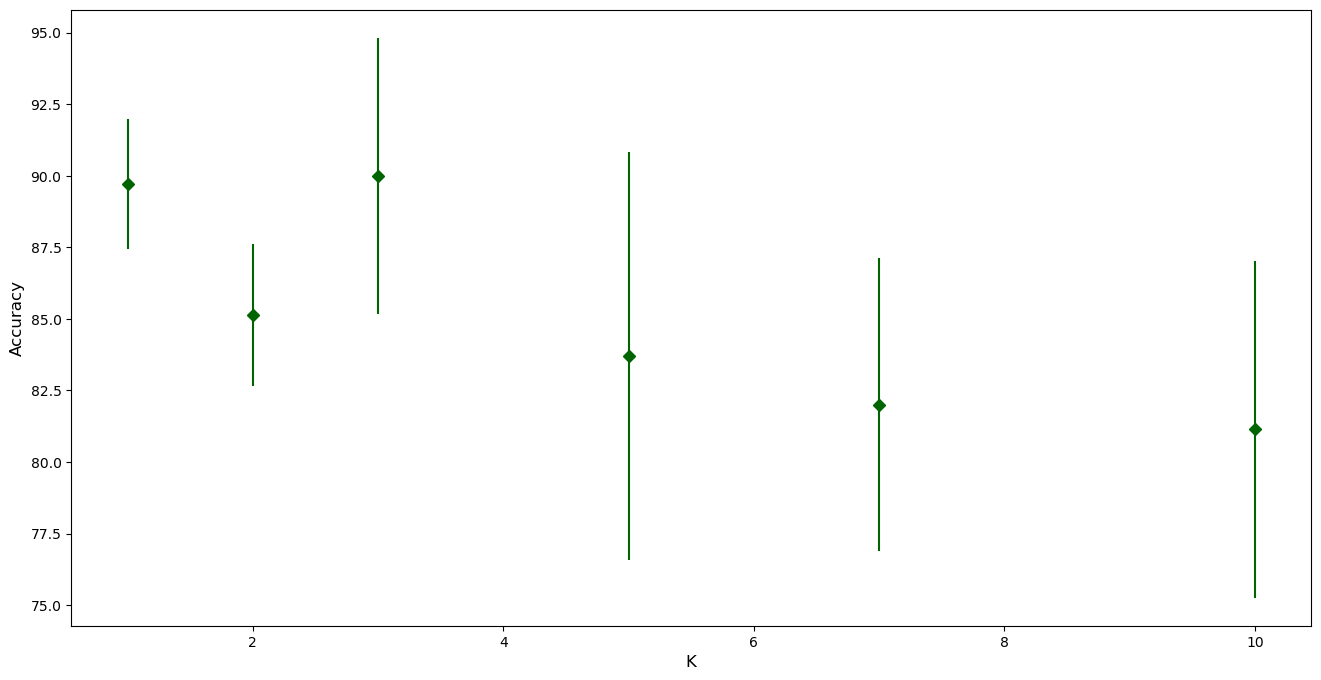

In [25]:
# Complétez le code ci-dessous. Attention, les données sont dans "data"/"data_normalized" et non dans "wines":


# Nous voulons 10 répétitions avec la méthode validation hold-out
N_REPETITIONS = 10

# Nous allons stocker les résultats dans un dictionnaire, avec pour chaque k une liste d'accuracy. 
results = defaultdict(list)
for a in [data, data_normalized]:
    # Pour chaque validation hold-out (test et train set différents) on test chaque k
    for i in range(N_REPETITIONS):
        for k in Ks:
            #print(f"----- N = {i} - k = {k} -----")  # Vous pouvez supprimer cette ligne une fois votre code fonctionnel
                                                     # Pour que le code tourne, la boucle ne doit pas être vide ;-)

            # Faire le train-test split avec split = 0.8
            # - complétez - 1 ligne
            train, data_copy = train_test_split(a, 0.8)

            # Obtenir les prédictions à l'aide de la fonction predict_classification()
            # Aide: utilisez la compréhension de liste [a for a in ...] pour chaque observation de test
            # - complétez - 1 ligne
            predictions = [predict_classification(train, test_row, k) for test_row in data_copy if test_row not in train]



            # Joindre à results[k] la liste des accuracies (obtenu avec la fonction accuracy_metric() ci dessus)
            # Aide: utilisez la méthode append() pour joindre l'accuracy aux résultats
            # Aide: utilisez la méthode accuracy_metric() pour obtenir l'accuracy
            # Aide: utilisez la compréhension de liste pour créer la liste des données originales
            # - complétez - 1 ligne (si vous y arrivez, sinon plus)

            # On compare les classes réelles des données qui sont dans le set de test et on compare ces valeurs aux prédictions faites sur les tests
            results[k].append(accuracy_metric([row[0] for row in data_copy if row not in train], predictions))



    # Ne pas modifier ci-dessous
    _, ax = plt.subplots(1, 1, figsize=(16, 8))

    means = [np.mean(v) for v in results.values()]
    stds = [np.std(v) for v in results.values()]

    ax.errorbar(results.keys(), means, stds, linestyle='None', marker='D', color='darkgreen')
    ax.set_ylabel('Accuracy', fontsize=12)
    ax.set_xlabel('K', fontsize=12)
    ax.set_title(f"Performance of classification with various K using K-NN (validation hold-out) {a.values[0]}", fontsize=14)
    ax.grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)

#### 2.2.2 Questions

(2 points)

___

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Pour quelle valeur(s) de k le modèle est-il le plus efficace ?</p>

Note: les résultats peuvent varier d'une exécution à l'autre. Indiquez la tendance générale.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Une fois les données normalisées, quelle différence observe-t-on ?</p>

___

*Réponse:* <br>
1. Les k pour lequels l'accuracy est généralement la plus élevée sont k = 1 et k=3.

2. En utilisant les données normalisées, on remarque que, peu importe le k, l'accuracy est globalement plus élevée qu'avec les données de base. On remarque aussi que les accuracies liées à chaque k sont plus proches les unes des autres. Sinon, les meilleurs k restent globalement les mêmes que les données soient normalisées ou pas. Enfin, on remarque que l'accuracy pour des k > 3 diminue plus vite avec les données non normalisées.

<div class="alert alert-block alert-info">
<b>Corrections 2.2: </b> Points obtenus: /8
</div>

Remarques: 

___

___

### 2.3 N_fold cross validation



Si vous voulez vous rafraîchir sur le sujet, voici [une courte vidéo de StatQuest](https://www.youtube.com/watch?v=fSytzGwwBVw) (ou [une autre en français](https://www.youtube.com/watch?v=xWgGOHiROmc)). Ne vous attardez pas trop sur les détails et variations de la validation croisée sauf si cela vous intéresse !



#### 2.3.1 Implémentation

(6 points)

Complétez le code ci-dessous en suivant les indications en commentaire, cette fois en utilisant la N-fold cross validation (souvent appelée k-fold, mais là on veut pas confondre avec notre k de k-NN). 

Utilisez en premier le dataset "***data***" puis une fois votre code fonctionnel, copiez les cellules  et remplacez le par le dataset avec les données normalisées: "***data_normalized***". N'oubliez pas de modifier le titre des graphiques pour que le résultat soit lisible. 

In [23]:

results_nfold = defaultdict(list)
for dataset in [data, data_normalized]:
    # Les données sont divisées en plusieurs folds
    folds = cross_validation_split(dataset, n_folds=5)

    for k in Ks:

        # Listes qui vont contenir les valeurs prédites et les vraies valeurs
        predictions = []
        actuals = []

        for test_i in range(len(folds)):
            print(f"----- Fold = {test_i } - k = {k} -----")

            # train = tout sauf le fold i, qui est utilisé pour tester.
            # Permet de créer une liste à partir des éléments de folds, y compris si c'est vide.
            train = list(itertools.chain.from_iterable(folds[:test_i] + folds[test_i+1:]))

            # test = Fold courrant, utilisé pour tester
            # - complétez - 1 ligne
            test = folds[test_i]

            # Effectue la prédiction et l'ajoute au tableau prédictions[] pour chaque element dans test
            # predictions += [...fonction pour faire la classification définie en début de point 2.... for....in ....]
            # - complétez - 1 ligne
            predictions += [predict_classification(train, value, k)  for value in test]

            # Remplit la liste "actual" avec les valeurs réelles
            # - complétez - 1 ligne
            actuals += [value[0] for value in test]
            #print(actual)

        # Mettez le résultat de "accuracy_metric(...,...)" dans results_nfold[k]
        # - complétez - 1 ligne
        results_nfold[k].append(accuracy_metric(actuals, predictions))
        print(f'Performance with k={k}: {results_nfold[k]}')
    


----- Fold = 0 - k = 1 -----
----- Fold = 1 - k = 1 -----
----- Fold = 2 - k = 1 -----
----- Fold = 3 - k = 1 -----
----- Fold = 4 - k = 1 -----
Performance with k=1: [91.42857142857143]
----- Fold = 0 - k = 2 -----
----- Fold = 1 - k = 2 -----
----- Fold = 2 - k = 2 -----
----- Fold = 3 - k = 2 -----
----- Fold = 4 - k = 2 -----
Performance with k=2: [85.71428571428571]
----- Fold = 0 - k = 3 -----
----- Fold = 1 - k = 3 -----
----- Fold = 2 - k = 3 -----
----- Fold = 3 - k = 3 -----
----- Fold = 4 - k = 3 -----
Performance with k=3: [88.57142857142857]
----- Fold = 0 - k = 5 -----
----- Fold = 1 - k = 5 -----
----- Fold = 2 - k = 5 -----
----- Fold = 3 - k = 5 -----
----- Fold = 4 - k = 5 -----
Performance with k=5: [86.85714285714286]
----- Fold = 0 - k = 7 -----
----- Fold = 1 - k = 7 -----
----- Fold = 2 - k = 7 -----
----- Fold = 3 - k = 7 -----
----- Fold = 4 - k = 7 -----
Performance with k=7: [82.85714285714286]
----- Fold = 0 - k = 10 -----
----- Fold = 1 - k = 10 -----
-----

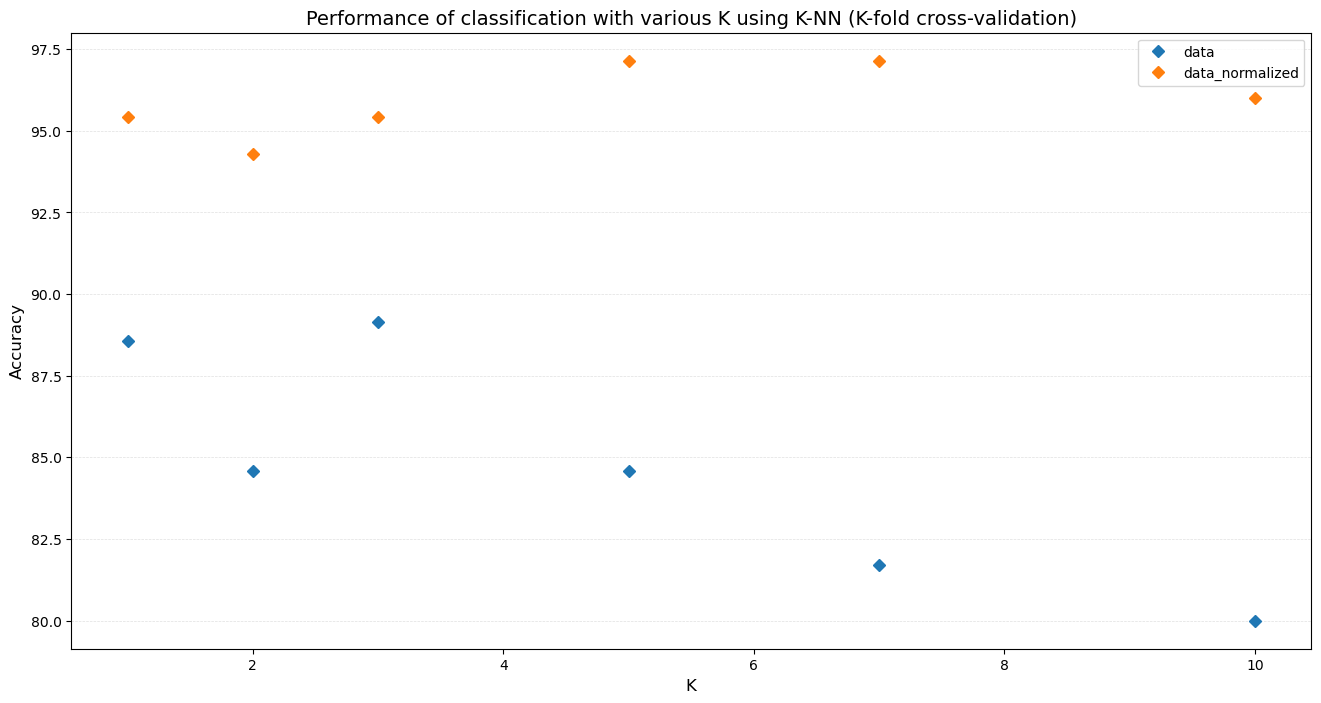

In [12]:
_, ax = plt.subplots(1, 1, figsize=(16, 8))

ax.plot(results_nfold.keys(), results_nfold.values(), linestyle='None', marker='D')
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_xlabel('K', fontsize=12)
ax.set_title(f'Performance of classification with various K using K-NN (K-fold cross-validation)', fontsize=14)
ax.grid(axis='y', linestyle='--', alpha=0.4, lw=0.5)
ax.legend(labels=['data', 'data_normalized'])


#### 2.3.2 Questions

(6 points)
___

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Pour quelle valeur(s) de k le modèle est-il le plus efficace ?</p>

Note: les résultats peuvent varier d'une exécution à l'autre. Indiquez la tendance générale.


*Réponse:*
Pour des valeurs de k assez grandes (entre 3 et 5). Après une certaine valeur de k (entre 7 et 10), l'accuracy recommence à diminuer.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Une fois les données normalisées, quelle différence observe-t-on ?</p>

*Réponse:*
Une accuracy plus élevée de manière générale. On remarque aussi que les variations d'accurcy sont moins importantes entre les différentes valeurs de k et que les données normalisées ont une accuracy qui diminue moins vite avec l'augmentation de k que les données non normalisées.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font> Pourquoi normaliser/standardiser les données lorsqu'on utilise k-NN ?</p>

Décrivez rapidement les raisons et effets de la normalisation dans la logique de k-NN.

*Réponse:*
Lorsque l'on utilise k-NN pour classer les valeurs selon plusieurs attributs, ces attributs n'ont pas forcément le même ordre de grandeur. Le calcul de la distance de k-NN peut donc négliger certains attributs avec des valeurs petites dans la classification. La normalisation permet donc de donner le même poids à chaque attribut.

<div class="alert alert-block alert-info">
<b>Corrections 2.3: </b> Points obtenus: /12
</div>

Remarques: 

## Exercice 3: Evaluation des résultats et matrice de confusion

(5 points)


Utilisez la bibliothèque scikit learn (sklearn.metrics, utilisé en première partie de ce TP au point 1.2.3) pour calculer la matrice de confusion du meilleur modèle trouvé précédemment (c.a.d., pour **un** K donné), sur l’ensemble de validation pour chaque « fold » de la validation croisée. Y a t il des classes pour lesquelles nous avons plus de peine à faire la bonne classification ? 



*Réponse*: <br>
C'est pour la classe 2 que nous avons le plus de peine à faire des prédictions. En effet, même si c'est la classe avec la meilleure accuracy, c'est la classe pour laquelle on a le plus de faux négatifs, dans le sens où des observations qui devraiment appartenir à la classe 2 sont mal classées par le modèle. 


----- Fold = 0 - k = 3 -----
----- Fold = 1 - k = 3 -----
----- Fold = 2 - k = 3 -----
----- Fold = 3 - k = 3 -----
----- Fold = 4 - k = 3 -----
Performance with k=3: [97.14285714285714]
Accuracy: 0.9714285714285714


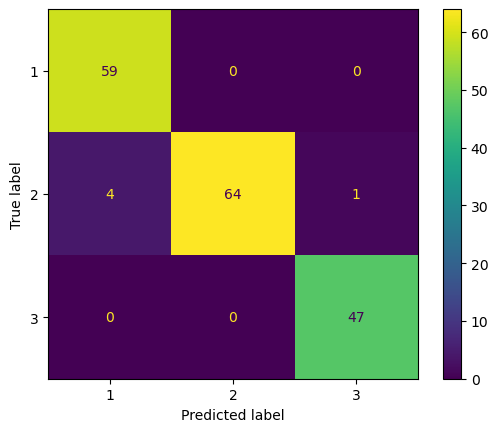

In [13]:
# Reprenez ici votre code de la partie précédente (mais cette fois avec une seul k) 
# Attention à changer les noms de variables si vous voulez ré-exécutez du code en amont du notebook.

# - Votre code -

results_nfold_best = defaultdict(list)

# Les données sont divisées en plusieurs folds
folds = cross_validation_split(data_normalized, n_folds=5)

k = 3

# Listes qui vont contenir les valeurs prédites et les vraies valeurs
predictions_best = []
actuals_best = []

for test_i in range(len(folds)):
    print(f"----- Fold = {test_i } - k = {k} -----")

    # train = tout sauf le fold i, qui est utilisé pour tester.
    # Permet de créer une liste à partir des éléments de folds, y compris si c'est vide.
    train = list(itertools.chain.from_iterable(folds[:test_i] + folds[test_i+1:]))

    # test = Fold courrant, utilisé pour tester
    # - complétez - 1 ligne
    test = folds[test_i]

    # Effectue la prédiction et l'ajoute au tableau prédictions[] pour chaque element dans test
    # predictions += [...fonction pour faire la classification définie en début de point 2.... for....in ....]
    # - complétez - 1 ligne
    predictions_best += [predict_classification(train, value, k)  for value in test]

    # Remplit la liste "actual" avec les valeurs réelles
    # - complétez - 1 ligne
    actuals_best += [value[0] for value in test]
    #print(actual)

# Mettez le résultat de "accuracy_metric(...,...)" dans results_nfold[k]
# - complétez - 1 ligne
results_nfold_best[k].append(accuracy_metric(actuals_best, predictions_best))
print(f'Performance with k={k}: {results_nfold_best[k]}')


# Avec les valeurs réels et prédites, afficher la matrice de confusion

score = accuracy_score(actuals_best, predictions_best)
print(f"Accuracy: {score}")
cm = confusion_matrix(actuals_best, predictions_best)
disp = ConfusionMatrixDisplay(cm, display_labels = ["1", "2", "3"])
disp.plot()
plt.show()


# - Votre code - 



<div class="alert alert-block alert-info">
<b>Corrections 3: </b> Points obtenus: /5
</div>

Remarques: 

## Exercice 4: L’algorithme LVQ

Utilisez l’algorithme LVQ pour traiter le problème de classification des vins et testez la performance (accuracy) des modèles et calculez la matrice de confusion du meilleur modèle trouvé en explorant différentes valeurs d'hyper-paramètres (c.a.d., nombre de prototypes, learning rate et nombre d’epochs), sur l’ensemble de validation pour chaque « fold » de la validation croisée. 

**4.1) Exécutez le code donné**

Le code vous est donné en partie ci-dessous. Exécutez-le, remplissez la partie manquante (4.2), et répondez aux questions. 


In [14]:
from math import sqrt
from random import randrange
from random import seed
from random import shuffle

# calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)

# Locate the best matching unit
def get_best_matching_unit(codebook, test_row):
    distances = list()
    for codevector in codebook:
        dist = euclidean_distance(codevector, test_row)
        distances.append((codevector, dist))
    distances.sort(key=lambda tup: tup[1])
    return distances[0][0]

# Make a prediction with codebook vectors
def predict(codebooks, test_row):
	bmu = get_best_matching_unit(codebooks, test_row)
	return bmu[-1]

# LVQ Algorithm
def predict_lvq(train, test, n_codebooks, lrate, epochs):
    codebooks = train_codebook(train, n_codebooks, lrate, epochs)
    return [predict(codebooks, row) for row in test]

# Create a random codebook vector
def init_codevector(train,category):
    n_records = len(train)
    n_features = len(train[0])-1
    found = False
    while(not found):
        random_observation = randrange(n_records)
        if (train[random_observation][-1] == category):
            found = True
            
    codevector = [train[random_observation][i] for i in range(n_features)]
    codevector.append(category)
    return codevector

# Create a random codebook vector
def random_codebook(train):
	n_records = len(train)
	n_features = len(train[0])
	codebook = [train[randrange(n_records)][i] for i in range(n_features)]
	return codebook

# Train a set of codebook vectors
def train_codebook(train, n_codevectors, lrate, epochs):
    codebook = [random_codebook(train) for i in range(n_codevectors)]
    for epoch in range(epochs):
        rate = lrate * (1.0-(epoch/float(epochs)))
        sum_error = 0.0
        shuffle(train)
        for row in train:
            bmu = get_best_matching_unit(codebook, row)
            for i in range(len(row)-1):
                error = row[i] - bmu[i]
                sum_error += error**2
                if bmu[-1] == row[-1]:
                    bmu[i] += rate * error
                else:
                    bmu[i] -= rate * error
        print('>epoch=%d, lrate=%.3f, error=%.3f' % (epoch, rate, sum_error))
    return codebook

Il n'y a pas besoin de modifier le code ci-dessous. 

In [15]:
# Le code ci-dessus attend la variable dépendante (Note) à la fin et non au début
# Quelques modifications s'imposent. 

# On garde le même scaler
scaler = StandardScaler()

# Créer une copie et prendre une liste des colonnes des données indépendantes (entrées)
df_normalized_end = wines.copy()
cols = wines.columns[wines.columns != 'Note']

# Remplacer les colonnes des données par les données transformées
df_normalized_end[cols] = scaler.fit_transform(df_normalized_end[cols])

# On prend la liste des colonnes et on met le premier élément à la fin
all_cols = df_normalized_end.columns.tolist()

all_cols = all_cols[1:] + [all_cols[0]]
print(f"Nouvel ordre des colonnes: {all_cols}")

df_normalized_end = df_normalized_end[all_cols]



# conversion en liste de listes pour k-NN
data_normalized_end = df_normalized_end.values.tolist()


Nouvel ordre des colonnes: ['Alcool', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline', 'Note']


In [16]:
# Parameters
seed(0)    # Pseudo aléatoire
lr = 0.3
n_epochs = 50
n_codevectors = 15

folds = cross_validation_split(data_normalized_end, n_folds=5)

predictions = []
actuals = []
results = defaultdict(list)
    
for test_i in range(len(folds)):
    
    train = list(itertools.chain.from_iterable(folds[:test_i] + folds[test_i+1:]))
    test = folds[test_i]
    
    predictions += predict_lvq(train, test, n_codevectors, lr, n_epochs)
    actuals += [i[-1] for i in test]
    print(actuals)
    print(predictions)
    print(f'Prediction of fold {test_i}: {accuracy_metric(actuals, predictions)}')


results[k] = accuracy_metric(actuals, predictions)
print(f'Performance of LVQ with ({lr=}, {n_epochs=}, {n_codevectors=}): {results[k]}')

>epoch=0, lrate=0.300, error=1939.794
>epoch=1, lrate=0.294, error=1671.179
>epoch=2, lrate=0.288, error=995.070
>epoch=3, lrate=0.282, error=1020.203
>epoch=4, lrate=0.276, error=978.699
>epoch=5, lrate=0.270, error=995.118
>epoch=6, lrate=0.264, error=1001.951
>epoch=7, lrate=0.258, error=1008.317
>epoch=8, lrate=0.252, error=985.716
>epoch=9, lrate=0.246, error=991.869
>epoch=10, lrate=0.240, error=944.570
>epoch=11, lrate=0.234, error=964.309
>epoch=12, lrate=0.228, error=950.920
>epoch=13, lrate=0.222, error=970.596
>epoch=14, lrate=0.216, error=952.848
>epoch=15, lrate=0.210, error=941.518
>epoch=16, lrate=0.204, error=945.091
>epoch=17, lrate=0.198, error=939.319
>epoch=18, lrate=0.192, error=947.325
>epoch=19, lrate=0.186, error=936.088
>epoch=20, lrate=0.180, error=939.759
>epoch=21, lrate=0.174, error=920.143
>epoch=22, lrate=0.168, error=907.719
>epoch=23, lrate=0.162, error=922.094
>epoch=24, lrate=0.156, error=908.364
>epoch=25, lrate=0.150, error=917.816
>epoch=26, lrate=

>epoch=24, lrate=0.156, error=1015.317
>epoch=25, lrate=0.150, error=999.324
>epoch=26, lrate=0.144, error=1007.204
>epoch=27, lrate=0.138, error=1000.534
>epoch=28, lrate=0.132, error=990.299
>epoch=29, lrate=0.126, error=988.035
>epoch=30, lrate=0.120, error=981.240
>epoch=31, lrate=0.114, error=979.885
>epoch=32, lrate=0.108, error=965.576
>epoch=33, lrate=0.102, error=969.503
>epoch=34, lrate=0.096, error=969.001
>epoch=35, lrate=0.090, error=968.495
>epoch=36, lrate=0.084, error=963.957
>epoch=37, lrate=0.078, error=963.328
>epoch=38, lrate=0.072, error=951.864
>epoch=39, lrate=0.066, error=947.457
>epoch=40, lrate=0.060, error=938.080
>epoch=41, lrate=0.054, error=940.667
>epoch=42, lrate=0.048, error=933.889
>epoch=43, lrate=0.042, error=932.426
>epoch=44, lrate=0.036, error=924.559
>epoch=45, lrate=0.030, error=922.416
>epoch=46, lrate=0.024, error=918.201
>epoch=47, lrate=0.018, error=913.934
>epoch=48, lrate=0.012, error=908.169
>epoch=49, lrate=0.006, error=903.380
[2.0, 2.0

**4.2) Affichez la matrice de confusion**

(3 points)

Accuracy: 0.9771428571428571


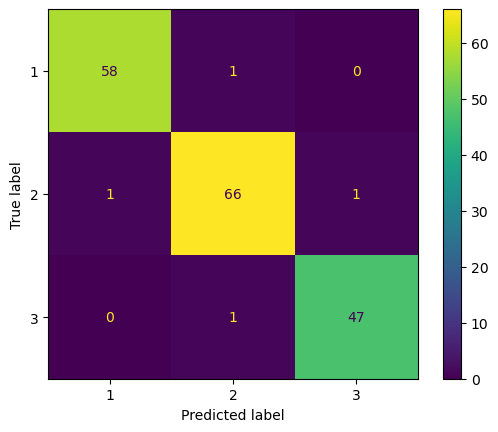

In [17]:
from sklearn.metrics import f1_score

# Écrivez le code pour la matrice de confusion
score = accuracy_score(actuals, predictions)
print(f"Accuracy: {score}")
cm = confusion_matrix(actuals, predictions)
disp = ConfusionMatrixDisplay(cm, display_labels = ["1", "2", "3"])
disp.plot()
plt.show()

____

**4.3) Questions**

(6 points)

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Commentez vos résultats et comparez l’accuracy de ce modèle avec celle obtenu avec k-NN.</p>

*Réponse:*<br> Les résultats sont excellents, la grande majorité des prédictions se trouvent dans la diagonale de la matrice. L'accuracy de ce modèle et l'accuracy du k-NN sont très proches (97.71% et 97.14%). Cependant, les matrices de confusions sont un peu différentes. Comme on le sait, l'accuracy nous donne des informations sur la performance globale d'un modèle et non pas sur la performance de celui-ci au sein d'une seule classe. Dans notre cas, bien que l'accuracy soit pratiquement la même entre nos deux modèles, les matrices de confusion nous montrent que la performance au sein des classes change d'un modèle à l'autre. <br>
En effet, avec k-NN, on voyait qu'on classait parfaitement les observations des classes 1 et 3 mais qu'on avait plus de mal à classer les observations de la classe 2 car c'étaient les seules qui produisaient des faux négatifs. <br>
Avec LVQ, on voit que la performance au sein des classes est plus homogène. On a 1 faux négatif lié à la classe 1, 2 à la classe 2 et 1 à la classe 3. <br>
En conclusion, le modèle acquis par k-NN a une performance parfaite pour les classes 1 et 3 et un peu moins bonne pour la classe 2, alors que le modèle acquis par LVQ a une performance bonne mais pas parfaite pour les 3 classes. <br>
On constate quand même que l'accuracy représente assez bien la performance de nos modèles car la distribution des données de base entre nos classes est assez équilibrée.

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Quelles sont les différences principales entre k-NN et LVQ au niveau algorithmique ?</p>

*Réponse:* <br>
Lorsqu'on utilise k-NN, nous utilisons toutes les donées disponibles pour classer de nouvelles observations. Il n'y a donc pas vraiment de modèle, c'est pour cela qu'on parle de "lazy learning".<br>
A l'inverse, LVQ cherche à déterminer un sous-ensemble de points, en l'occurence, les prototypes, qui représente au mieux la base de donnée entière. Le but du prototypage est de ne plus avoir besoin de tous les points de la base de donéee pour classer une nouvelle observation. En effet, une fois les prototypes trouvés, LVQ va se baser sur la classe du plus proche prototype pour prédire la classe de chaque nouvelle observation. Cette fois, on peut dire que le sous-ensemble de points contenant les prototype est un modèle de la base de donnée.

____
**4.4) Pseudo aléatoire**
(3 points)

**Exécutez le code ci-dessous plusieurs fois et observez les résultats. Dé-commentez la ligne qui fixe le générateur de nombre pseudo-aléatoires (*seed(0)*) et exécutez à nouveau la cellule plusieurs fois.**

In [24]:
#seed(0)
dataset = [[2.7810836,2.550537003,0],
[1.465489372,2.362125076,0],
[3.396561688,4.400293529,0],
[1.38807019,1.850220317,0],
[3.06407232,3.005305973,0],
[7.627531214,2.759262235,1],
[5.332441248,2.088626775,1],
[6.922596716,1.77106367,1],
[8.675418651,-0.242068655,1],
[7.673756466,3.508563011,1]]
learn_rate = 0.2
n_epochs = 20
n_codevectors = 2
codebook = train_codebook(dataset, n_codevectors, learn_rate, n_epochs)
print('Codebook: %s' % codebook)

colors = ['r','g','b']
plt.scatter([i[0] for i in codebook],[j[1] for j in codebook],c='y')
plt.scatter([i[0] for i in dataset],[j[1] for j in dataset],c=[colors[k[2]] for k in dataset])
plt.title("scatter plot des deux classes et leurs prototypes")
plt.xlabel("x1")
plt.ylabel("x2")

NameError: name 'train_codebook' is not defined

<p style="background-color:#AFEEEE;padding:3px"><font size="4"><b>Q </b></font>Que constatez-vous ? A quoi sert un générateur de nombre pseudo aléatoire ?</p>

*Réponse:* <br>
Lorsque le seed n'est pas fixe, les prototypes changent à chaque fois qu'on exécute la cellule, ce qui est logique puisqu'on commence donc à chaque fois avec deux prototypes placés au hasard avant de commencer l'algorithme. On remarque que suivant où sont placés les points de départ, les prototypes finaux peuvent se retrouver très loins des classes qu'ils sont sensés représenter car ils n'ont pas que le temps de se rapprocher assez en 20 epochs et sont donc une mauvaise représentation de la classe à laquelle ils sont associés. Au contraire, si par chance les points de départ sont proches des clusters des classes qu'ils sont sensés représenter, les prototypes finaux sont aussi très proches. <br>
Lorsque le seed est fixe, les prototypes trouvés sont toujours les mêmes. C'est logique puisqu'on utilise toujours le même dataset de base et que les hyper-paramètres (nombre epochs, nombres prototypes et et learn rate) sont fixés. Le résultat de l'algorithme sera donc toujours le même. <br>
Le générateur de nombre aléatoire nous permet de tester des seeds de prototypes différents et de trouver ceux qui représentent le mieux les classes auxquels ils sont associés. Une fois la meilleure seed trouvée, on peut la fixer.

<div class="alert alert-block alert-info">
<b>Corrections 4: </b> Points obtenus: /12
</div>

Remarques: 

FIN